In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from morlet import morlet_wavelet

In [2]:
df = pd.read_csv("data/4500.csv")

In [ ]:
df

In [3]:
dfO1 = df.loc[:, "O1"]
O1 = dfO1.to_numpy()

In [4]:
x = np.arange(4500) / 500

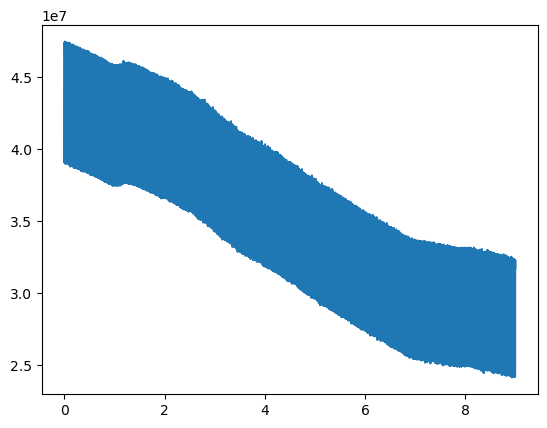

In [5]:
plt.plot(x, O1)

In [6]:
dfF8 = df.loc[:, "F8"]
F8 = dfF8.to_numpy()

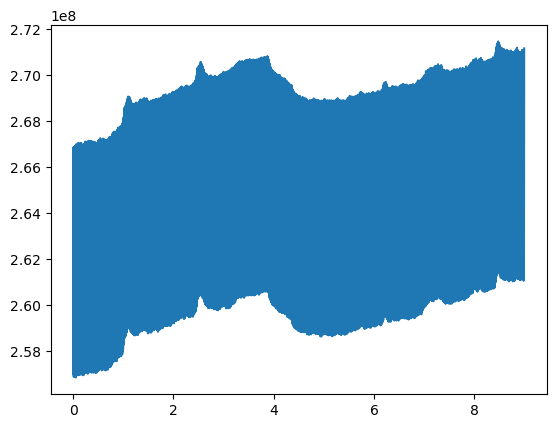

In [7]:
plt.plot(x, F8)

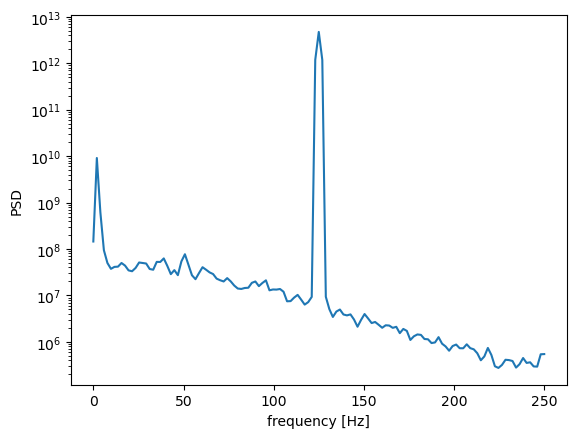

In [8]:
f, Pxx_den = signal.welch(O1, 500)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

In [ ]:
b, a = signal.iirfilter(20, Wn=45, fs=500, btype="low", ftype="butter")

In [ ]:
O1Filtered = signal.lfilter(b, a, O1)

In [ ]:
f, Pxx_den = signal.welch(O1Filtered, 500)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

In [ ]:
plt.plot(x, O1Filtered)

In [ ]:
plt.plot(x[200:], O1Filtered[200:])

In [ ]:
srate = 500
n_cycles = 80
frex = 12
width = 4 # seconds

cmw = morlet_wavelet(srate, n_cycles, frex, width)

time = np.arange(0, width * srate) / srate
time = time - np.mean(time)

plt.plot(time, np.real(cmw))
plt.show()
